# Building a model

This is a fork from [nvnn's kernel](https://www.kaggle.com/nvnnghia/svm-knn-0-943) supplemented with [Chris Deotte's idea for feature selection](https://www.kaggle.com/c/instant-gratification/discussion/92930):

In [ ]:
import pandas as pd

train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
train.head()

In [124]:
import numpy as np
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


submission=test[["id"]].copy()
submission["target"] = -1.0
performance_report = pd.DataFrame({
    "segment": range(512),
    "mean": 0,
    "std": 0
})

for i in range(10,11):
    Y = train.loc[train["wheezy-copper-turtle-magic"]==i, "target"]
    X = train.loc[train["wheezy-copper-turtle-magic"]==i, :].drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
    X_te = test.loc[test["wheezy-copper-turtle-magic"]==i, :].drop(["id", "wheezy-copper-turtle-magic"], axis=1)
    selected_columns = X.columns[(X.std(axis=0)>2).values]
    X = X.loc[:, selected_columns]
    X_te = X_te[selected_columns]
    
    model = RandomForestClassifier(n_estimators=100, random_state=1)
    scores_rf = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    print(np.mean(scores_rf), "+/-", np.std(scores_rf))
    
    model = svm.SVC(kernel='poly', degree=4, probability=True, gamma='auto', random_state=1)
    scores_svm = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    print(np.mean(scores_svm), "+/-", np.std(scores_svm))
    
    model = LogisticRegression(solver='liblinear', penalty="l1", random_state=1)
    scores_lr = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    print(np.mean(scores_lr), "+/-", np.std(scores_lr))
    
    model = KNeighborsClassifier(n_neighbors=12)
    scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
    print(np.mean(scores_knn), "+/-", np.std(scores_knn))
    
    print(np.mean(scores_lr+scores_knn+scores_svm+scores_rf)/4)
#    performance_report.loc[i, "mean"] = np.mean(scores_rf)
#    performance_report.loc[i, "std"] = np.std(scores_rf)
#    model = RandomForestClassifier(n_estimators=100, n_jobs=-1).fit(X, Y)
#    submission.loc[test["wheezy-copper-turtle-magic"]==i, "target"] =  model.predict_proba(X_te)[:,1]

(498, 46)
0.8593323076923076 +/- 0.05603340189396544
0.9256169230769231 +/- 0.03979160996743073
0.8384641025641024 +/- 0.05233782069732335
0.9114225641025641 +/- 0.035877471074526525
0.8837089743589743


In [68]:
performance_report.to_csv("performance.csv", index=False)
submission.to_csv("submission.csv", index=False)

In [71]:
print(model)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=4, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [125]:
Y = train.loc[train["wheezy-copper-turtle-magic"]==i, "target"]
X = train.loc[train["wheezy-copper-turtle-magic"]==i, :].drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X_te = test.loc[test["wheezy-copper-turtle-magic"]==i, :].drop(["id", "wheezy-copper-turtle-magic"], axis=1)

0.7705384615384616 +/- 0.06904833113749462


In [88]:
from sklearn import mixture

dpgmm = mixture.BayesianGaussianMixture(n_components=X.shape[1], covariance_type='full').fit(X)
print(len(set(dpgmm.predict(X))))

255


In [89]:
print(dpgmm.weights_)

[6.01197723e-03 5.99988079e-03 7.98367988e-03 5.97558977e-03
 1.39145878e-02 5.95107382e-03 7.91830306e-03 7.90177229e-03
 5.91387905e-03 3.93426841e-03 3.92595079e-03 9.79408291e-03
 3.90926222e-03 5.85133692e-03 1.55700094e-02 5.82600525e-03
 5.81322903e-03 3.86694978e-03 9.64603385e-03 7.69964053e-03
 1.72853481e-02 5.17376525e-02 9.55779201e-03 9.53436627e-03
 9.51076658e-03 9.48698990e-03 7.57042647e-03 9.43895437e-03
 5.64881397e-03 3.75614513e-03 1.87320714e-02 5.60471542e-03
 3.72651312e-03 5.57482392e-03 1.48262347e-02 1.10892114e-02
 1.10584084e-02 1.83787639e-02 1.09953880e-02 3.65438127e-03
 3.64363322e-03 5.44932774e-03 7.24421042e-03 1.26394125e-02
 1.26008782e-02 3.58907014e-03 8.94472342e-03 5.34990419e-03
 8.88820096e-03 3.54384876e-03 1.23634600e-02 3.52079749e-03
 3.50917785e-03 3.49755820e-03 8.71484640e-03 3.47420155e-03
 3.46246454e-03 3.45072752e-03 3.43899051e-03 6.85450700e-03
 6.83087109e-03 5.10530285e-03 5.08738976e-03 3.37960891e-03
 1.68381232e-02 5.032933

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


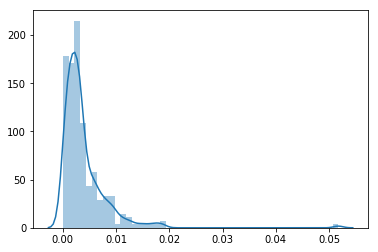

In [94]:
import seaborn as sns

sns.distplot(dpgmm.weights_)

In [98]:
print(np.sum(dpgmm.weights_ > np.quantile(dpgmm.weights_, 0.95)))

13


In [150]:
dpgmm = mixture.BayesianGaussianMixture(n_components=X.shape[1], covariance_type='full', random_state=2019).fit(X)
dpgmm = mixture.BayesianGaussianMixture(n_components=np.sum(dpgmm.weights_ > np.quantile(dpgmm.weights_, 0.95)), 
                                        covariance_type='full', random_state=2019).fit(X)

In [160]:
clusters = pd.DataFrame({
    "cluster_name": dpgmm.predict(X),
    "Y": Y
})
dic = clusters.groupby("cluster_name").mean()

In [164]:
dic.iloc[1,0]

0.76

# Using nearest neighbours

In [153]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.892178717948718 +/- 0.05602891193937103


In [154]:
model = KNeighborsClassifier(n_neighbors=4)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.9080287179487179 +/- 0.048117300211240784


In [155]:
model = KNeighborsClassifier(n_neighbors=10)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.9172041025641026 +/- 0.04611708958304699


In [156]:
model = KNeighborsClassifier(n_neighbors=15)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.915403076923077 +/- 0.041509737738911166


In [157]:
model = KNeighborsClassifier(n_neighbors=12)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.9174066666666667 +/- 0.04237298588961886


In [158]:
model = KNeighborsClassifier(n_neighbors=8)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.907411794871795 +/- 0.053871691284880695


# Classifiers with new column

Now, comparing all the classifiers with the new column (and trying to fine tune the amount of components to be considered in the clustering):

In [182]:
Y = train.loc[train["wheezy-copper-turtle-magic"]==i, "target"]
X = train.loc[train["wheezy-copper-turtle-magic"]==i, :].drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X_te = test.loc[test["wheezy-copper-turtle-magic"]==i, :].drop(["id", "wheezy-copper-turtle-magic"], axis=1)

selected_columns = X.columns[(X.std(axis=0)>2).values]
X = X.loc[:, selected_columns]
X_te = X_te[selected_columns]

dpgmm = mixture.BayesianGaussianMixture(n_components=X.shape[1], covariance_type='full', random_state=2019).fit(X)
dpgmm = mixture.BayesianGaussianMixture(n_components=np.sum(dpgmm.weights_ > np.quantile(dpgmm.weights_, 0.95)), 
                                        covariance_type='full', random_state=2019).fit(X)
dic = pd.DataFrame({"cluster_name": dpgmm.predict(X), "Y": Y}).groupby("cluster_name").mean()

column_train = [dic.iloc[i, 0] for i in dpgmm.predict(X)]
column_test = [dic.iloc[i, 0] for i in dpgmm.predict(X_te)]

X["train_column"] = column_train
X_te["train_column"] = column_test

model = RandomForestClassifier(n_estimators=100, random_state=1)
scores_rf = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

model = svm.SVC(kernel='poly', degree=4, probability=True, gamma='auto', random_state=1)
scores_svm = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))
    
model = LogisticRegression(solver='liblinear', penalty="l1", random_state=1)
scores_lr = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_lr), "+/-", np.std(scores_lr))
    
model = KNeighborsClassifier(n_neighbors=12)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.8725889743589743 +/- 0.05371748644376091
0.9262574358974358 +/- 0.03968764451505268
0.8381564102564102 +/- 0.05233166334852297
0.910672564102564 +/- 0.03597762188996562


In [183]:
Y = train.loc[train["wheezy-copper-turtle-magic"]==i, "target"]
X = train.loc[train["wheezy-copper-turtle-magic"]==i, :].drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X_te = test.loc[test["wheezy-copper-turtle-magic"]==i, :].drop(["id", "wheezy-copper-turtle-magic"], axis=1)

dpgmm = mixture.BayesianGaussianMixture(n_components=X.shape[1], covariance_type='full', random_state=2019).fit(X)
dpgmm = mixture.BayesianGaussianMixture(n_components=np.sum(dpgmm.weights_ > np.quantile(dpgmm.weights_, 0.95)), 
                                        covariance_type='full', random_state=2019).fit(X)
dic = pd.DataFrame({"cluster_name": dpgmm.predict(X), "Y": Y}).groupby("cluster_name").mean()

column_train = [dic.iloc[i, 0] for i in dpgmm.predict(X)]
column_test = [dic.iloc[i, 0] for i in dpgmm.predict(X_te)]

X["train_column"] = column_train
X_te["train_column"] = column_test

model = RandomForestClassifier(n_estimators=100, random_state=1)
scores_rf = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

model = svm.SVC(kernel='poly', degree=4, probability=True, gamma='auto', random_state=1)
scores_svm = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))
    
model = LogisticRegression(solver='liblinear',random_state=1)
scores_lr = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_lr), "+/-", np.std(scores_lr))
    
model = KNeighborsClassifier(n_neighbors=12)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.7597635897435897 +/- 0.06643442513188137
0.9557241025641027 +/- 0.024170192715627772
0.7634015384615385 +/- 0.06425126662245965
0.9174066666666667 +/- 0.04237298588961886


In [188]:
Y = train.loc[train["wheezy-copper-turtle-magic"]==i, "target"]
X = train.loc[train["wheezy-copper-turtle-magic"]==i, :].drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X_te = test.loc[test["wheezy-copper-turtle-magic"]==i, :].drop(["id", "wheezy-copper-turtle-magic"], axis=1)

dpgmm = mixture.BayesianGaussianMixture(n_components=X.shape[1], covariance_type='full', random_state=2019).fit(X)
dpgmm = mixture.BayesianGaussianMixture(n_components=np.sum(dpgmm.weights_ > np.quantile(dpgmm.weights_, 0.90)), 
                                        covariance_type='full', random_state=2019).fit(X)
dic = pd.DataFrame({"cluster_name": dpgmm.predict(X), "Y": Y}).groupby("cluster_name").mean()

column_train = [dic.iloc[i, 0] for i in dpgmm.predict(X)]
column_test = [dic.iloc[i, 0] for i in dpgmm.predict(X_te)]

X["train_column"] = column_train
X_te["train_column"] = column_test

model = RandomForestClassifier(n_estimators=100, random_state=1)
scores_rf = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

model = svm.SVC(kernel='poly', degree=4, probability=True, gamma='auto', random_state=1)
scores_svm = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))
    
model = LogisticRegression(solver='liblinear',random_state=1)
scores_lr = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_lr), "+/-", np.std(scores_lr))
    
model = KNeighborsClassifier(n_neighbors=12)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.8440938461538462 +/- 0.07794952530114954
0.9557241025641027 +/- 0.024170192715627772
0.7709507692307692 +/- 0.06083755869576362
0.9174066666666667 +/- 0.04237298588961886


In [189]:
Y = train.loc[train["wheezy-copper-turtle-magic"]==i, "target"]
X = train.loc[train["wheezy-copper-turtle-magic"]==i, :].drop(["id", "target", "wheezy-copper-turtle-magic"], axis=1)
X_te = test.loc[test["wheezy-copper-turtle-magic"]==i, :].drop(["id", "wheezy-copper-turtle-magic"], axis=1)

dpgmm = mixture.BayesianGaussianMixture(n_components=X.shape[1], covariance_type='full', random_state=2019).fit(X)
dpgmm = mixture.BayesianGaussianMixture(n_components=np.sum(dpgmm.weights_ > np.quantile(dpgmm.weights_, 0.85)), 
                                        covariance_type='full', random_state=2019).fit(X)
dic = pd.DataFrame({"cluster_name": dpgmm.predict(X), "Y": Y}).groupby("cluster_name").mean()

column_train = [dic.iloc[i, 0] for i in dpgmm.predict(X)]
column_test = [dic.iloc[i, 0] for i in dpgmm.predict(X_te)]

X["train_column"] = column_train
X_te["train_column"] = column_test

model = RandomForestClassifier(n_estimators=100, random_state=1)
scores_rf = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_rf), "+/-", np.std(scores_rf))

model = svm.SVC(kernel='poly', degree=4, probability=True, gamma='auto', random_state=1)
scores_svm = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_svm), "+/-", np.std(scores_svm))
    
model = LogisticRegression(solver='liblinear',random_state=1)
scores_lr = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_lr), "+/-", np.std(scores_lr))
    
model = KNeighborsClassifier(n_neighbors=12)
scores_knn = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_knn), "+/-", np.std(scores_knn))

0.8547328205128204 +/- 0.04637716760379711
0.9555641025641026 +/- 0.024167836658068896
0.7799184615384616 +/- 0.06072440980219664
0.9174066666666667 +/- 0.04237298588961886


Basically, the SVM seems slightly better with the feature. It should added to the others.

# Gradient Boosting

Trying algorithms that uses gradient boosting to assess the performance (without fine-tuning):

In [186]:
from xgboost import XGBClassifier

model = XGBClassifier()
scores_xgb = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_xgb), "+/-", np.std(scores_xgb))

0.836582564102564 +/- 0.06404839968879468


In [187]:
from lightgbm import LGBMClassifier

model = LGBMClassifier()
scores_gbm = cross_val_score(model, X, Y, cv=10, scoring='roc_auc')
print(np.mean(scores_gbm), "+/-", np.std(scores_gbm))

0.835346153846154 +/- 0.0522229364241173
